In [1]:
# Mount google drive

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load the dataset from google drive
import pandas as pd

dataset_directory = '/content/drive/My Drive/google_colab/data/suspicious_tweets.csv'

data = pd.read_csv(dataset_directory)


# Preprocessing of data

In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset from google drive
data = pd.read_csv(dataset_directory)

# Preprocessing function
def preprocess_text(text):
    # Remove URLs and special characters
    text = re.sub(r'http\S+|www\S+|[^a-zA-Z]', ' ', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize text
    words = nltk.word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back into a single string
    text = ' '.join(words)
    
    return text

# Apply preprocessing to the 'message' column
data['message'] = data['message'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Normalization, scaling, and transformation of data

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['message'])
y = data['label']


# Creation of machine learning or deep learning model

In [5]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()


# Training of the models

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)


MultinomialNB()

# Extraction of rules, trends, or patterns

In [7]:
feature_log_probs = model.feature_log_prob_

# Visualization of rules, trends, or patterns

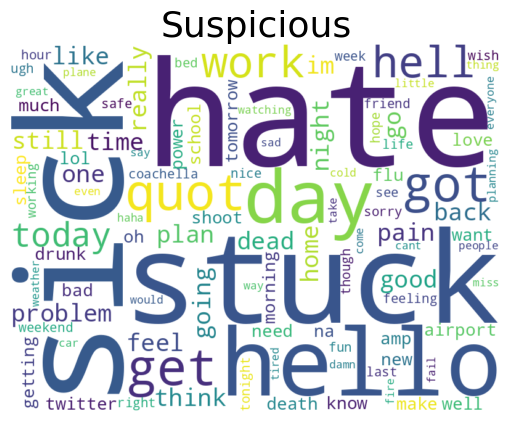

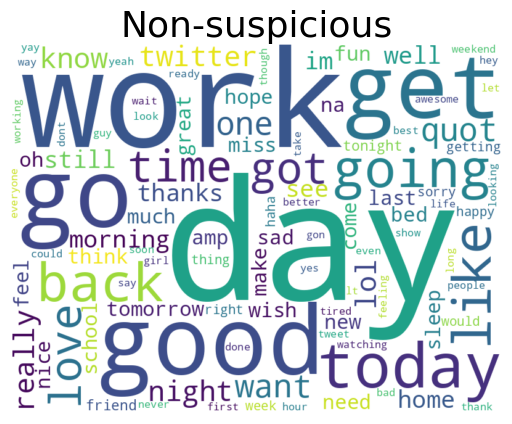

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(class_index, class_label, feature_log_probs, vectorizer):
    class_probabilities = dict(zip(vectorizer.get_feature_names_out(), feature_log_probs[class_index]))
    wc = WordCloud(width=800, height=600, background_color='white', max_words=100).generate_from_frequencies(class_probabilities)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(class_label, fontsize=26)
    plt.show()

plot_wordcloud(0, "Suspicious", feature_log_probs, vectorizer)
plot_wordcloud(1, "Non-suspicious", feature_log_probs, vectorizer)



# Model evaluation

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')


Accuracy: 0.9030833333333333
Precision: 0.9028743819659767
Recall: 0.9996288736314716
F1-score: 0.9487913345955704


# Optimizing the evaluated model

In [10]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Naive Bayes
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]}

# Perform grid search
grid_search = GridSearchCV(model, params, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print(f'Best Model: {best_model}')
print(f'Accuracy: {accuracy_best}')
print(f'Precision: {precision_best}')
print(f'Recall: {recall_best}')
print(f'F1-score: {f1_best}')


Best Model: MultinomialNB(alpha=0.1)
Accuracy: 0.9240833333333334
Precision: 0.9386503067484663
Recall: 0.9794952681388013
F1-score: 0.9586379114642452


# Reprint the word cloud of the best_model

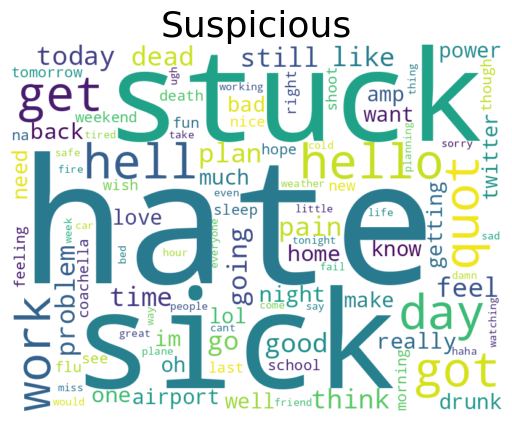

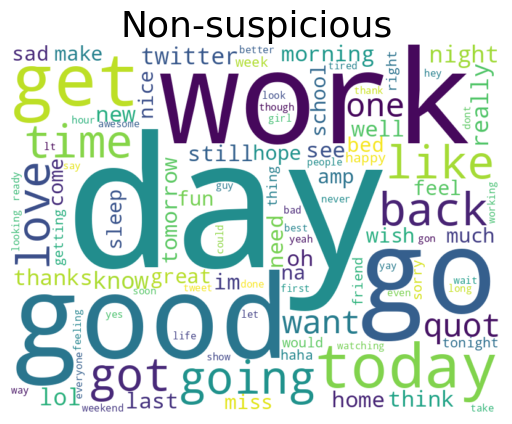

In [11]:
best_feature_log_probs = best_model.feature_log_prob_

plot_wordcloud(0, "Suspicious", best_feature_log_probs, vectorizer)
plot_wordcloud(1, "Non-suspicious", best_feature_log_probs, vectorizer)


# Saving and loading the model

In [18]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
# Saving the model

import joblib

joblib.dump(model, 'suspicious_discussion_model.pkl')

['suspicious_discussion_model.pkl']

In [21]:
# Loading the model

loaded_model = joblib.load('suspicious_discussion_model.pkl')
